In [1]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
import matplotlib.pyplot as plt

In [2]:
# Read file and store as pandas dataframe
filename = '../Data/day.csv'
df = pd.read_csv(filename)

In [3]:
# Quick glance at information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
# Quick glance at summary statistics of dataset
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [5]:
# Remove 'instant' and 'dteday' attributes
df = df.drop('instant', axis=1)
df = df.drop('dteday', axis=1)

In [6]:
# Summary information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   yr          731 non-null    int64  
 2   mnth        731 non-null    int64  
 3   holiday     731 non-null    int64  
 4   weekday     731 non-null    int64  
 5   workingday  731 non-null    int64  
 6   weathersit  731 non-null    int64  
 7   temp        731 non-null    float64
 8   atemp       731 non-null    float64
 9   hum         731 non-null    float64
 10  windspeed   731 non-null    float64
 11  casual      731 non-null    int64  
 12  registered  731 non-null    int64  
 13  cnt         731 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 80.1 KB


In [7]:
X = df.values
cols = range(0, df.shape[1])

In [8]:
# Extract attribute names
attributeNames = list(df.columns)

# OR
# attributeNames = np.asarray(df.columns[cols])

attributeNames

['season',
 'yr',
 'mnth',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered',
 'cnt']

In [9]:
# Check attributes and data shape
N, M = X.shape
print("No. of instances, N: ", N)
print("No. of attributes, M: ", M)

No. of instances, N:  731
No. of attributes, M:  14


In [10]:
# Undo the original max-min normalization
temp = df.columns.get_loc("temp")
atemp = df.columns.get_loc("atemp")
hum = df.columns.get_loc("hum")
windspeed = df.columns.get_loc("windspeed")

for row in range(0, N):
    X[row, temp] = X[row, temp]*(39-(-8)) + (-8)
    X[row, atemp] = X[row, atemp]*(50-(-16)) + (-16)
    X[row, hum] = X[row, hum]*100
    X[row, windspeed] = X[row, windspeed]*67

In [11]:
X

array([[1.000e+00, 0.000e+00, 1.000e+00, ..., 3.310e+02, 6.540e+02,
        9.850e+02],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.310e+02, 6.700e+02,
        8.010e+02],
       [1.000e+00, 0.000e+00, 1.000e+00, ..., 1.200e+02, 1.229e+03,
        1.349e+03],
       ...,
       [1.000e+00, 1.000e+00, 1.200e+01, ..., 1.590e+02, 1.182e+03,
        1.341e+03],
       [1.000e+00, 1.000e+00, 1.200e+01, ..., 3.640e+02, 1.432e+03,
        1.796e+03],
       [1.000e+00, 1.000e+00, 1.200e+01, ..., 4.390e+02, 2.290e+03,
        2.729e+03]])

In [12]:
# Standarize ratio data attributes for PCA
cnt_col = df.columns.get_loc("cnt")
print("cnt_col: ", cnt_col)

for col in range(temp, cnt_col+1):
    # subtract mean, column by column
    mn = X[:, col].mean(0)
    X[:, col] = X[:, col] - np.ones(N) * mn
    X[:, col] = X[:, col] * (1/np.std(X[:, col]))
    
# Check standardization
print("mean cnt: ", X[:, 13].mean(0))
print("std cnt: ", np.std(X[:, 13]))


cnt_col:  13
mean cnt:  -1.166417623682791e-16
std cnt:  0.9999999999999999


In [13]:
X.shape

(731, 14)

In [14]:
# Focus on the last 7 attributes for now
col1 = df.columns.get_loc("temp")
col2 = df.columns.get_loc("cnt")

X = X[:,col1:col2+1]
X.shape


(731, 7)

In [15]:
X

array([[-0.82666213, -0.67994602,  1.25017133, ..., -0.7537338 ,
        -1.9254707 , -1.81795256],
       [-0.72109471, -0.74065231,  0.47911298, ..., -1.04521412,
        -1.91520896, -1.91299949],
       [-1.63465665, -1.749767  , -1.33927398, ..., -1.06124554,
        -1.5566892 , -1.62992496],
       ...,
       [-1.32322427, -1.42434419,  0.87839173, ..., -1.00440687,
        -1.58683308, -1.63405743],
       [-1.30955752, -1.49004895, -1.01566357, ..., -0.70563955,
        -1.42649329, -1.39902293],
       [-1.52822548, -1.54048197, -0.35406086, ..., -0.59633443,
        -0.87620714, -0.91707305]])

In [16]:
# PCA by computing SVD
U, S, V = svd(X, full_matrices=False)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum()

# Project data onto principal component space
Z = X @ V

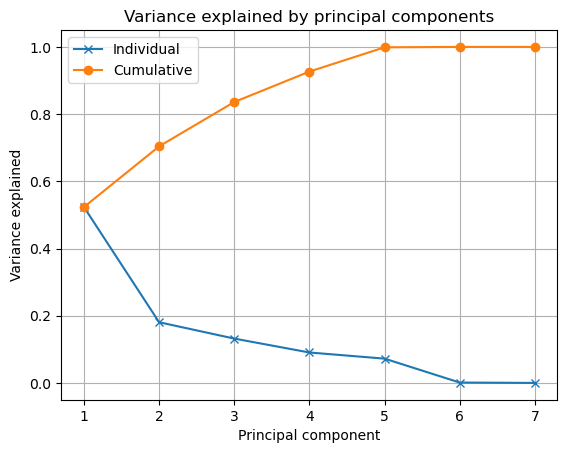

In [17]:
# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho)+1), rho, 'x-')
plt.plot(range(1, len(rho)+1), np.cumsum(rho), 'o-')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend(['Individual', 'Cumulative'])
plt.grid()
plt.show()

In [18]:
rho


array([5.23455716e-01, 1.80612299e-01, 1.31972061e-01, 9.05522771e-02,
       7.22755800e-02, 1.13206690e-03, 4.78348563e-33])